In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전 처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('C:/Users/Playdata/Downloads/data/titanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)

### 오차 행렬

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, mypredictions)

pd.DataFrame(confusion_matrix(y_test, mypredictions), columns=['0', '1'])

,0,1
0,92,18
1,20,49


+ 정확성
 



+ 정밀도  
실제 음성인 데이터 예측을 양성으로 잘못 판단 시 업무상 큰 영향이 발생하는 경우  
 재판, 스팸메일 차단  
 ex) 스팸메일을 못 걸러냈다고 하더라도 한번의 귀찮음이 생길뿐 어마어마한 일이 생기지는 않는다.  
     스팸메일 경우의 수를 낮게 낮추더라도 중요한 메일을 거를 경우의수를 뺀다.
     
     
+ 재현율  <> 반비례 관계인 정밀도.
실제 양성 데이터를 음성으로 잘못 판단 시 업무상 큰 영향이 발생하는 경우  
 암 판단 모델, 금융사기 모델  
 ex) 암의 가능성이 1이라도 있어서 암이라고 판단시, 세상 모든사람들은 암이라고 생각하고 혼란에 빠질수 있다.

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('C:/Users/Playdata/Downloads/data/titanic.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


In [6]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [7]:
# Binarizer의 threshold 설정값 0.5  0.4 , 1이 더 많아진다.
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

# 재현율이 올라가니 암환자 같은 케이스는 좀더 좋다.

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [8]:
# 테스트 수행을 위한 모든 임계값을 리스트로 저장
thresholds = [0,0.4, 0.45, 0.5, 0.55, 0.6,0.65]


# 임계값 이 0 이면 모든 환자를 다 암에 걸린 환자로 결정한다.
# 100 프로의 확률로 다 맞힐수 있다.
# 임계값이 1이면 모드가 다 정상인이라고 한다.
# 하지만 정밀도와 재현율이 0 이 된다.
# 실제로는 0.1~ 0,9을 많이 사용한다.

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0
오차 행렬
[[  0 118]
 [  0  61]]
정확도: 0.3408, 정밀도: 0.3408, 재현율: 1.0000
임계값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임계값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임계값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377
임계값: 0.65
오차 행렬
[[115   3]
 [ 22  39]]
정확도: 0.8603, 정밀도: 0.9286, 재현율: 0.6393


In [9]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15) # thresholds.shape = (147, )
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


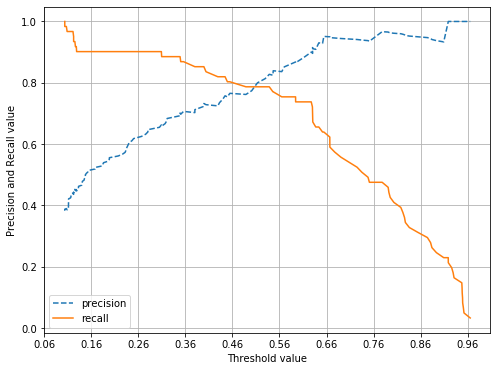

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
     # X 축을 threshold 값으로, Y 축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    # threshold 값 X 축의 Scale을 0,1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))
# F1 스코어: 0.7966

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
pred_prob = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)


F1 스코어: 0.7805
임계값: 0
오차 행렬
[[  0 118]
 [  0  61]]
정확도: 0.3408, 정밀도: 0.3408, 재현율: 1.0000, F1:0.5083
임계값: 0.1
오차 행렬
[[ 18 100]
 [  0  61]]
정확도: 0.4413, 정밀도: 0.3789, 재현율: 1.0000, F1:0.5495
임계값: 0.2
오차 행렬
[[75 43]
 [ 6 55]]
정확도: 0.7263, 정밀도: 0.5612, 재현율: 0.9016, F1:0.6918
임계값: 0.3
오차 행렬
[[89 29]
 [ 6 55]]
정확도: 0.8045, 정밀도: 0.6548, 재현율: 0.9016, F1:0.7586
임계값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786
임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036
임계값: 0.7
오차 행렬
[[116   2]
 [ 28  33]]
정확도: 0.8324, 정밀도: 0.9429, 재현율: 0.5410, F1:0.6875
임계값: 0.8
오차 행렬
[[117   1]
 [ 36  25]]
정확도: 0.7933, 정밀도: 0.9615, 재현율: 0.4098, F1:0.5747
임계값: 0.9
오차 행렬
[[117   1]
 [ 47  14]]
정확도: 0.7318, 정밀도: 0.9333, 재현율: 0.2295, F1:0.3684
임계값: 1
오차 행렬
[[118   0]
 [ 61   0]]
정확도: 0.6592, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


roc
수신자 판단 곡선
2차 대전때 통신장비 성능 평가를 위해 고안된 수치

머신러닝 이진 분류 모델의 예측 성능 판단에 중요한 평가 지표

tpr =tp/(fn+tp), 재현율

tnr = rn/(fp+tn)

fpr = fp / (fp+tn)

fpr = 1-tnr


fpr = 분류결정임곗값 -1
        


In [15]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prob_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_prob_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값: [1.97 0.75 0.63 0.59 0.49 0.4  0.31 0.15 0.12 0.11 0.1 ]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
샘플 임곗값별 TPR: [0.    0.475 0.672 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


In [16]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_prob_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_prob_class1)
# 반환된 임곗값 배열 로우가 47건 추출
thr_index = np.arange(0, thresholds.shape[0])
print('임곗값 배열의 index:', thr_index)
print('전체 임곗값:', np.round(thresholds[thr_index], 2))

# 추출된 임곗값에 따른 FPR, TPR 값
print('전체 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('전체 임곗값별 TPR:', np.round(tprs[thr_index], 3))

임곗값 배열의 index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
전체 임곗값: [1.97 0.97 0.92 0.91 0.78 0.75 0.65 0.65 0.64 0.64 0.63 0.63 0.63 0.63
 0.59 0.59 0.56 0.55 0.55 0.54 0.49 0.45 0.45 0.44 0.43 0.4  0.38 0.36
 0.35 0.35 0.31 0.31 0.24 0.23 0.15 0.15 0.13 0.13 0.13 0.13 0.12 0.12
 0.12 0.12 0.11 0.11 0.11 0.11 0.11 0.11 0.1  0.1  0.01]
전체 임곗값별 FPR: [0.    0.    0.    0.008 0.008 0.017 0.017 0.025 0.025 0.034 0.034 0.034
 0.042 0.042 0.059 0.059 0.076 0.076 0.085 0.085 0.127 0.127 0.136 0.136
 0.161 0.161 0.186 0.186 0.195 0.195 0.237 0.237 0.305 0.331 0.466 0.483
 0.576 0.576 0.585 0.585 0.61  0.619 0.636 0.636 0.686 0.703 0.754 0.788
 0.797 0.797 0.814 0.814 1.   ]
전체 임곗값별 TPR: [0.    0.033 0.23  0.23  0.475 0.475 0.639 0.639 0.656 0.656 0.672 0.705
 0.705 0.738 0.738 0.754 0.754 0.77  0.77  0.787 0.787 0.803 0.803 0.82
 0.82  0.852 0.852 0.869 0.869 0.885 0.885 0.902 

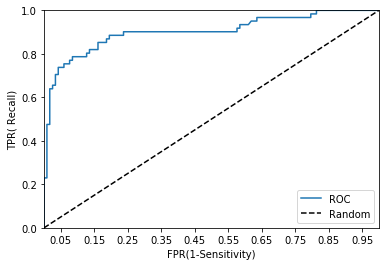

In [17]:
def roc_curve_plot(y_test, pred_prob_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y측 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR( Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

# tpr 초반에 급격히 올라가고 그 후에 평범하게 가는게 좋은 데이터 파일이다라는 전제를 둔다.
# 하지만 절반 이하로 떨어지면 쓸데없는 데이터이다.

In [19]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8341
